## Project 1 
This file performs all the processing from the differents functions

In [1]:
## -----------Importation of all the differents useful module-------------- 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine


## 1. Open the datasets and look at it (warning! there are multi tabs in the Excel file)

In [2]:
## creation of the engine 
wells_data_sql = create_engine("sqlite+pysqlite:////Users/brahimakeita/Documents/GitHub/PDM/Project 1/wells_data.db")

In [3]:
##open norway wells
norway_wells = pd.read_sql("select * from wells_data ; ", wells_data_sql)
norway_wells.head()

## open csv 
daily_production_data = pd.read_excel("/Users/brahimakeita/Documents/GitHub/PDM/Project 1/Volve production data.xlsx")
monthly_production_data = pd.read_excel("/Users/brahimakeita/Documents/GitHub/PDM/Project 1/Volve production data.xlsx", sheet_name = 1)

## 2. Convert the database (file wells_data.db) to an XLSX and send it to a local PostgreSQL database

In [4]:
## Conversion to excel 
norway_wells.to_excel('norway_wells.xlsx')

## 3.Wells Data

<AxesSubplot:xlabel='wlbTotalDepth', ylabel='wlbBottomHoleTemperature'>

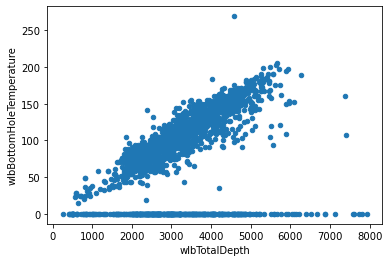

In [5]:
## Plot all temperature values 
norway_wells.plot.scatter(x = 'wlbTotalDepth', y = 'wlbBottomHoleTemperature')

<AxesSubplot:xlabel='wlbTotalDepth', ylabel='wlbBottomHoleTemperature'>

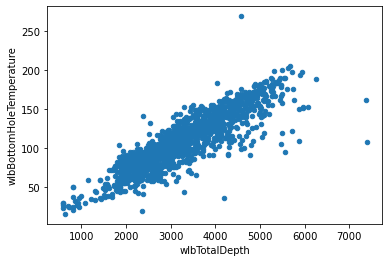

In [6]:
## Plotting without wlbBottomHoleTemperature if wlbBottomHoleTemperature different 0
norway_wells_without0 = norway_wells.where(norway_wells['wlbBottomHoleTemperature'] != 0)
norway_wells_without0.plot.scatter(x = 'wlbTotalDepth', y = 'wlbBottomHoleTemperature')

<AxesSubplot:xlabel='wlbTotalDepth', ylabel='wlbDrillingDays'>

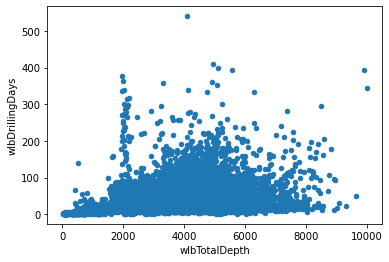

In [21]:
norway_wells_0_800 = norway_wells.where((norway_wells['wlbDrillingDays'] > 0) & (norway_wells['wlbDrillingDays'] < 800) )
norway_wells_0_800.plot.scatter(x = 'wlbTotalDepth', y = 'wlbDrillingDays')
#norway_wells_0_800.shape

In [17]:
## Computation of the mean total_depht group by "Age At Td"
wells_mean_ATd = norway_wells['wlbTotalDepth'].groupby(by = norway_wells['wlbAgeAtTd']).mean()
wells_mean_ATd.head()

wlbAgeAtTd
CAMPANIAN              3574.000000
CARBONIFEROUS          3368.500000
CRETACEOUS             4449.833333
DEVONIAN               4438.000000
EARLY CARBONIFEROUS    1767.666667
Name: wlbTotalDepth, dtype: float64

## 4.Production Data 

In [9]:
monthly_production_data_7405 = monthly_production_data[monthly_production_data['NPDCode'] == 7405].iloc[1:]
monthly_production_data_7405['month_year'] = monthly_production_data_7405['Year'].astype(int).astype(str) + '-' + monthly_production_data_7405['Month'].astype(int).astype(str)
monthly_production_data_7405['monthly_vol_OGW'] = monthly_production_data_7405['Oil']+monthly_production_data_7405['Gas']+monthly_production_data_7405['Water']

<AxesSubplot:title={'center':'Monthly Production for 7405'}, xlabel='month_year'>

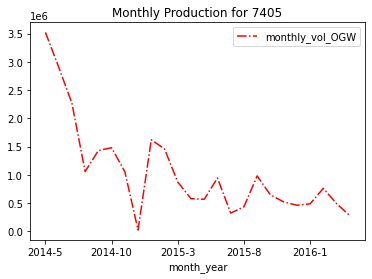

In [10]:
##Using 
monthly_production_data_7405.plot(x = 'month_year' , y = 'monthly_vol_OGW', title = 'Monthly Production for 7405', legend = True, color = 'r', style = '-.')

In [11]:
## Sum of production by Volves 
monthly_production_data['monthly_vol_OGW'] = monthly_production_data['Oil']+monthly_production_data['Gas']+monthly_production_data['Water']
production_by_Volve = monthly_production_data['monthly_vol_OGW'].groupby(by = monthly_production_data['NPDCode']).sum()
production_by_Volve

NPDCode
5351.0    589073025.15
5599.0    678955207.94
5693.0               0
5769.0       6616519.6
7078.0    176549175.98
7289.0     22706235.91
7405.0     26825930.32
Name: monthly_vol_OGW, dtype: object

## 5.Merged Data 

In [12]:
## partial_wells_data from wells_data by keeping only wlbTotalDepthcolumns and the common column
partial_wells_data = norway_wells[['wlbNpdidWellbore', 'wlbTotalDepth']]

## partial_mpd from monthly_production_data (mpd) by keeping only Oil, Gas Water
## and the common column and making a sum aggregation grouping by the common column
partial_mpd = monthly_production_data[['NPDCode','Oil','Gas','Water']]

In [13]:
merged_data = partial_wells_data.merge(partial_mpd , how = 'inner', left_on='wlbNpdidWellbore', right_on='NPDCode')

In [14]:
merged_data.iloc[40:50].head()

,wlbNpdidWellbore,wlbTotalDepth,NPDCode,Oil,Gas,Water
40,5351,3750.0,5351.0,31194.51,4835912.15,81258.77
41,5351,3750.0,5351.0,20211.31,3064565.93,42012.13
42,5351,3750.0,5351.0,49730.28,7681607.89,108934.77
43,5351,3750.0,5351.0,51053.13,8021384.18,133957.61
44,5351,3750.0,5351.0,21807.23,3406338.4,56487.87


<AxesSubplot:title={'center':'Production By Depth'}, xlabel='wlbTotalDepth', ylabel='total_OGW'>

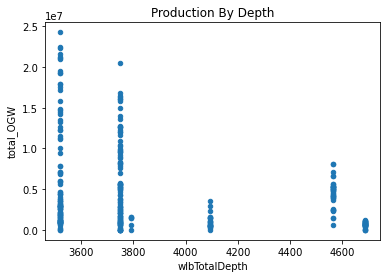

In [15]:
## Scatter plot and the depth 
merged_data['total_OGW'] = merged_data['Oil'] + merged_data['Gas'] + merged_data['Water']

merged_data.plot.scatter(x = 'wlbTotalDepth', y = 'total_OGW', title = 'Production By Depth', legend = True)